In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### data reading

In [27]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# Stage 2.1

### test function distance_between_skew_lines()

In [28]:
from retina import distance_between_skew_lines, points2vec

In [29]:
real = []
exp = []
for event_i in set(data.EventID.values):
    event = data[data.EventID==event_i]
    track1 = event[(event.TrackID==2)&(event.StatNb<3)]
    if len(track1)>1:
        x0=track1.X.values[0]
        x1=track1.X.values[1]
        y0=track1.Y.values[0]
        y1=track1.Y.values[1]
        z0=track1.Z.values[0]
        z1=track1.Z.values[1]
    else:
        continue
    track_point, track_direction = points2vec(np.array([x0, y0, z0, x1, y1, z1]))
    for i in range(len(track1)):
        params = track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i]
        tube_point, tube_direction = points2vec(params)
        exp.append(distance_between_skew_lines(track_point, track_direction, tube_point, tube_direction))
        real.append(track1.dist2Wire.values[i])
        
    track2 = event[(event.TrackID==3)&(event.StatNb<3)]
    if len(track2)>1:
        x0=track2.X.values[0]
        x1=track2.X.values[1]
        y0=track2.Y.values[0]
        y1=track2.Y.values[1]
        z0=track2.Z.values[0]
        z1=track2.Z.values[1]
    else:
        continue
    track_point, track_direction = points2vec(np.array([x0, y0, z0, x1, y1, z1]))
    for i in range(len(track2)):
        params = track2[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i]
        tube_point, tube_direction = points2vec(params)
        exp.append(distance_between_skew_lines(track_point, track_direction, tube_point, tube_direction))
        real.append(track2.dist2Wire.values[i])

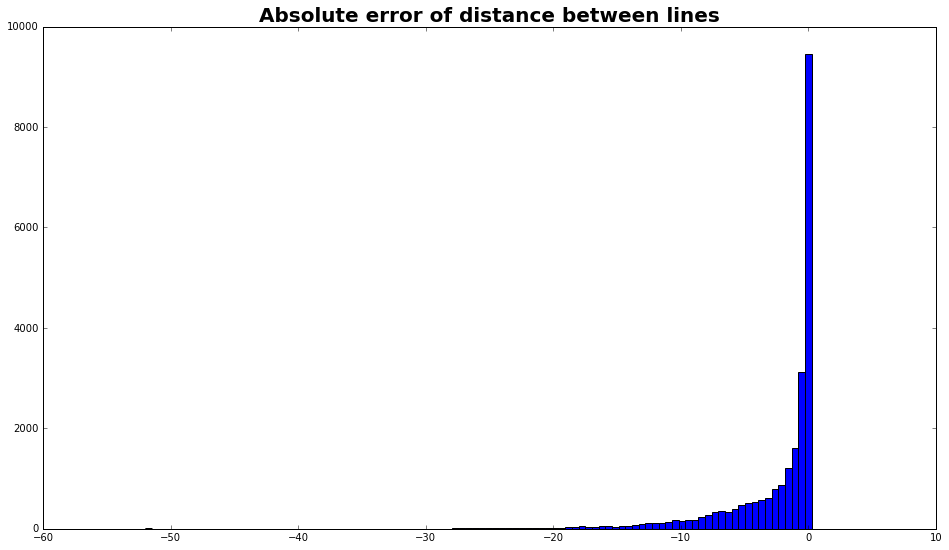

In [30]:
plt.figure(figsize=(16,9))
plt.title("Absolute error of distance between lines", fontsize=20, fontweight='bold')
hist_arr = plt.hist(np.array(real)-np.array(exp), bins=100)

Result is strange. A lot of distances from track to its tubes were found with huge error. May be realization is the reason of this effect. May be tracks reconstructed from 2 points are wrong.

### how to use artifitial_retina_response()

In [4]:
from retina import artifitial_retina_response

In [7]:
artifitial_retina_response(track_point, track_direction, track1, 20)

array(6.429460644417849e-05)

# Stage 2.2

# 2D projections

In [31]:
from retina import plot_artifitial_retina_response, params2vec

In [32]:
event = data[data.EventID==2]
event_before_magnet = event[event.StatNb<3]

In [33]:
size = 30
ms = np.linspace(-0.5, 0.5, size)
y0s = np.linspace(-500, 1500, size)
ls = np.linspace(-0.5, 0.5, size)
x0s = np.linspace(-250, -750, size)

In [34]:
#4d-grid of responses
sigma = 5
grid = np.ndarray(shape=(len(x0s), len(ls), len(y0s), len(ms)))
for i in range(len(x0s)):
    for j in range(len(ls)):
        for s in range(len(y0s)):
            for t in range(len(ms)):
                track_point, track_direction = params2vec(ls[j], x0s[i], ms[t], y0s[s])
                grid[i, j, s, t] = artifitial_retina_response(track_point, track_direction, event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

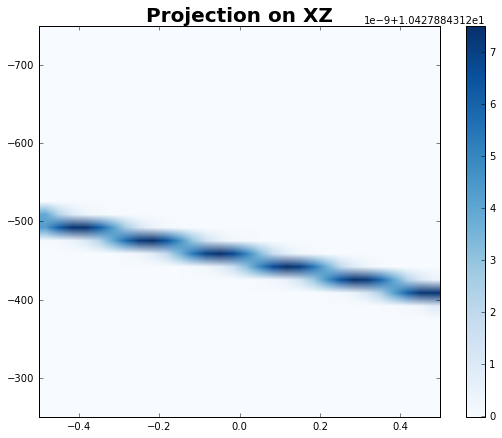

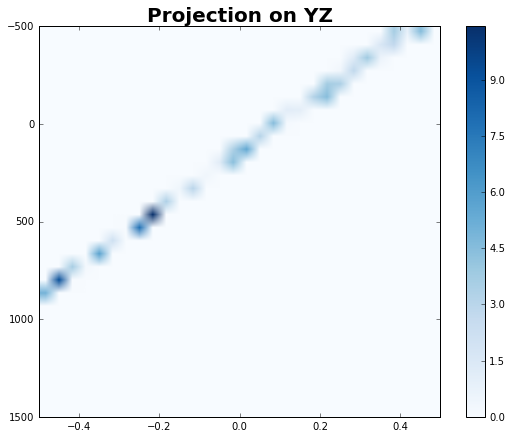

In [35]:
local_projections_1 = plot_artifitial_retina_response(grid, ms, y0s, ls, x0s)

Range of parametres is wide, it is obvious that projections are similar to lines. To make pictures more visual it is necessary to 